In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [521]:
food = pd.read_csv("/Users/tyler/Portfolio/food_order.csv")
food = food.iloc[:, 2:9]
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        1898 non-null   object 
 1   cuisine_type           1898 non-null   object 
 2   cost_of_the_order      1898 non-null   float64
 3   day_of_the_week        1898 non-null   object 
 4   rating                 1898 non-null   object 
 5   food_preparation_time  1898 non-null   int64  
 6   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 103.9+ KB


In [522]:
df_cuisine_type = pd.DataFrame(food["cuisine_type"].value_counts())
df_cuisine_type.reset_index(inplace=True)
df_cuisine_type.columns = ["Type", "Freq"]
print(df_cuisine_type)

              Type  Freq
0         American   584
1         Japanese   470
2          Italian   298
3          Chinese   215
4          Mexican    77
5           Indian    73
6   Middle Eastern    49
7    Mediterranean    46
8             Thai    19
9           French    18
10        Southern    17
11          Korean    13
12         Spanish    12
13      Vietnamese     7


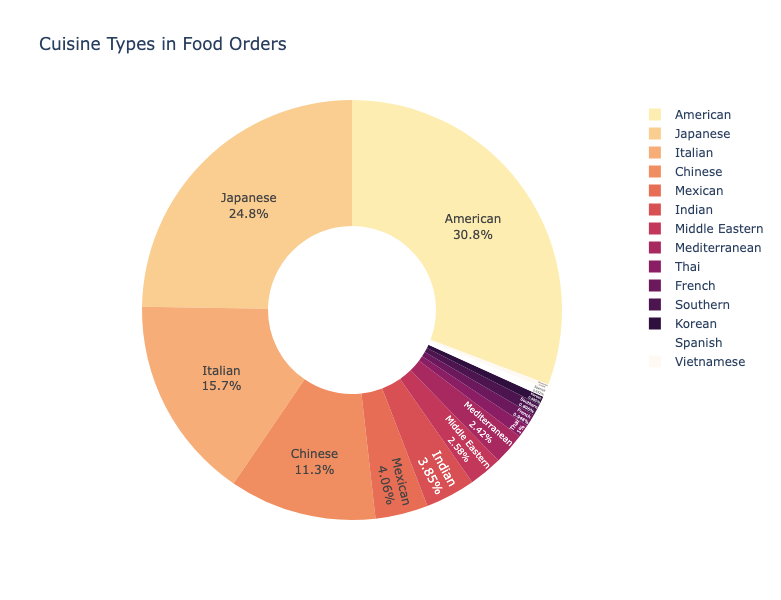

The majority of orders are for American, Japanese, Italian, and Chinese cuisines, among others.


In [523]:
fig = px.pie(df_cuisine_type, values="Freq", names="Type", 
             title="Cuisine Types in Food Orders",
             color_discrete_sequence=px.colors.sequential.matter,
             hole=0.4,
             width=800,
             height=600)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

print("The majority of orders are for American, Japanese, Italian, and Chinese cuisines, among others.")

In [524]:
df_day = pd.DataFrame(food["day_of_the_week"].value_counts())
df_day.reset_index(inplace=True)
df_day.columns = ["Day", "Freq"]
df_day["prob"] = df_day["Freq"] / df_day["Freq"].sum()
df_day = df_day.sort_values(by="Day", ascending=False)
df_day["prop"] = df_day["Freq"] / df_day["Freq"].sum() * 100
df_day["ypos"] = df_day["prop"].cumsum() - 0.5 * df_day["prop"]

In [525]:
food_by_restaurant = pd.DataFrame(food["restaurant_name"].value_counts()).reset_index()

In [526]:
restaurant = food[["restaurant_name"]]

count_restaurant = restaurant.groupby("restaurant_name").value_counts().reset_index(name="count")
count_top10 = count_restaurant.sort_values(by="count",ascending=False).head(10)

In [527]:
top10 = (count_top10["count"].sum()) / (count_restaurant["count"].sum())

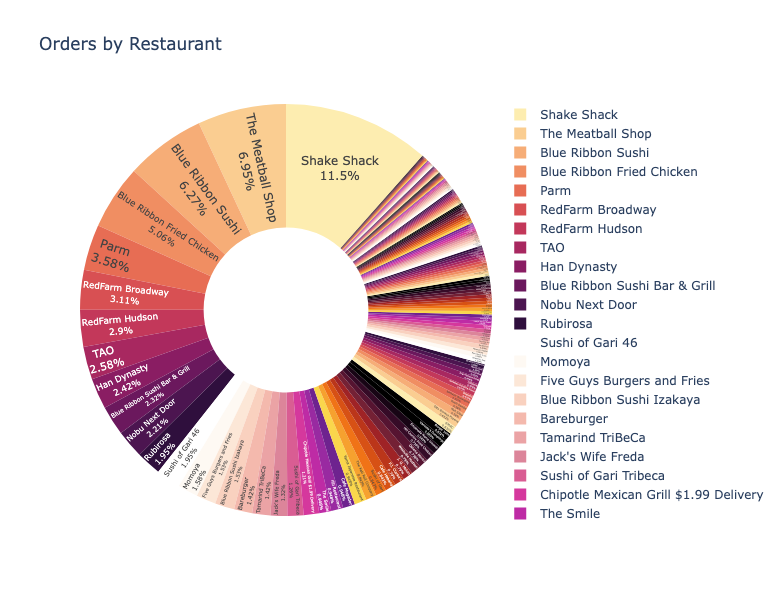

The top 10 restaurants by order volume account for 46.73 % of all orders.


In [528]:
fig = px.pie(food_by_restaurant, values="restaurant_name", names="index", 
             title="Orders by Restaurant",
             color_discrete_sequence=px.colors.sequential.matter,
             hole=0.4,
             width=800,
             height=600)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

print ("The top 10 restaurants by order volume account for",round(top10*100,2),"% of all orders.")

In [529]:
rate_by_restaurant = food[["restaurant_name","rating"]]
rate_by_restaurant = rate_by_restaurant[rate_by_restaurant['rating'].str.contains('\d')]

full_restaurant = rate_by_restaurant[rate_by_restaurant["rating"] == "5"]

top10_by_rate = full_restaurant.groupby("restaurant_name")["rating"].value_counts().reset_index(name="count")
top10_by_rate = top10_by_rate.sort_values(by="count",ascending=False).head(10)

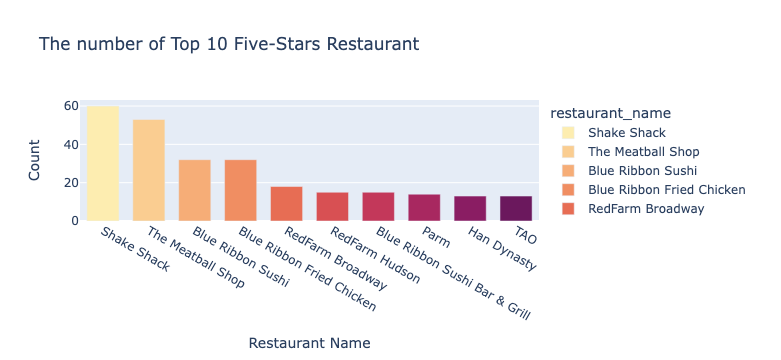

Restaurants with high order volumes tend to have high ratings.


In [530]:
fig = px.bar(top10_by_rate, x="restaurant_name", y="count", color="restaurant_name", 
             title="The number of Top 10 Five-Stars Restaurant",color_discrete_sequence=px.colors.sequential.matter)
fig.update_layout(xaxis=dict(type="category"))
fig.update_layout(xaxis_title="Restaurant Name",yaxis_title="Count", bargap=0.3)
fig.show()

print("Restaurants with high order volumes tend to have high ratings.")

In [531]:
food_rating = pd.DataFrame(food["rating"].value_counts()).reset_index()

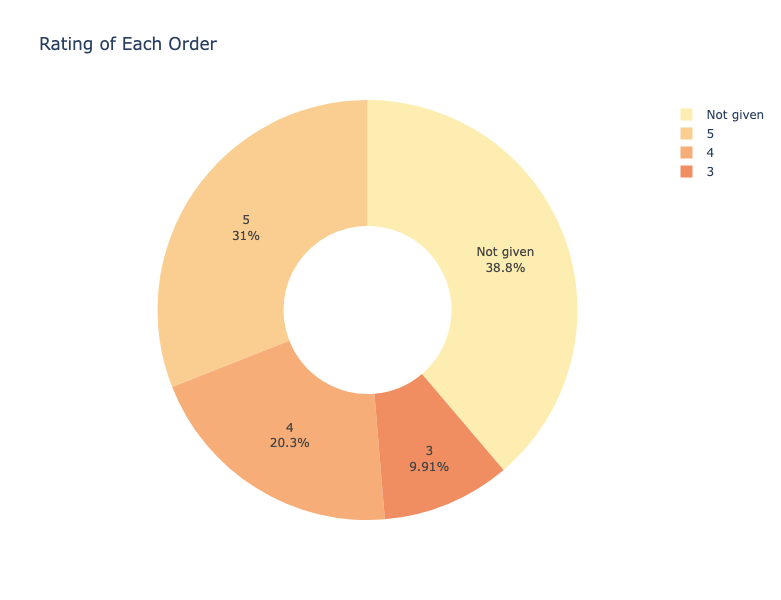

38.8% of customers did not rate.


In [532]:
fig = px.pie(food_rating, values="rating", names="index", 
             title="Rating of Each Order",
             color_discrete_sequence=px.colors.sequential.matter,
             hole=0.4,
             width=800,
             height=600)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

print("38.8% of customers did not rate.")

In [533]:
food["food_to_home_time"] = food[["food_preparation_time", "delivery_time"]].sum(axis=1, skipna=True)

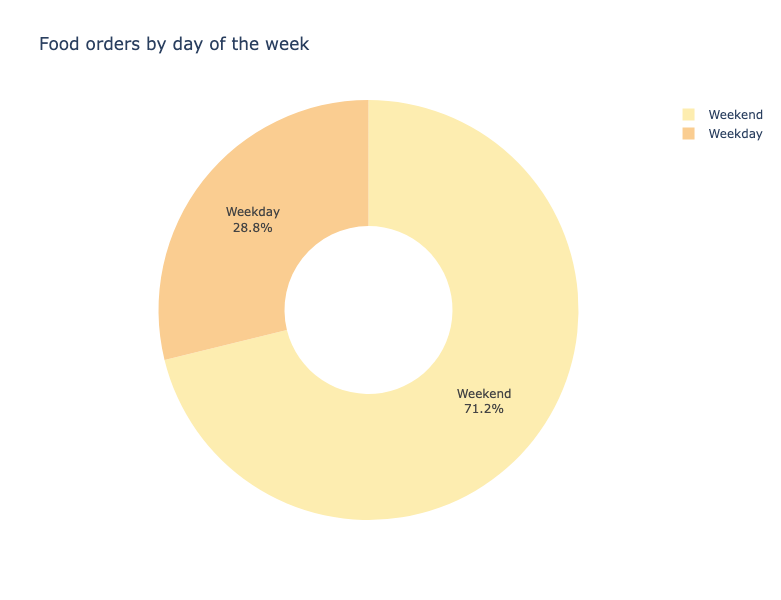

Order volume is higher on weekends (two days) than on weekdays (five days).


In [534]:
fig = px.pie(df_day, values="Freq", names="Day",
             color_discrete_sequence=px.colors.sequential.matter,
             title="Food orders by day of the week",
             hole=0.4,
             width=800,
             height=600)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()
print("Order volume is higher on weekends (two days) than on weekdays (five days).")

In [535]:
mean_rating = food[["cuisine_type", "rating"]].dropna()
mean_rating = mean_rating[mean_rating['rating'].str.contains('\d')]

mean_rating["rating"] = pd.to_numeric(mean_rating["rating"])
mean_rating = mean_rating.groupby("cuisine_type")["rating"].mean().reset_index()
mean_rating = mean_rating.sort_values('rating', ascending=[False])

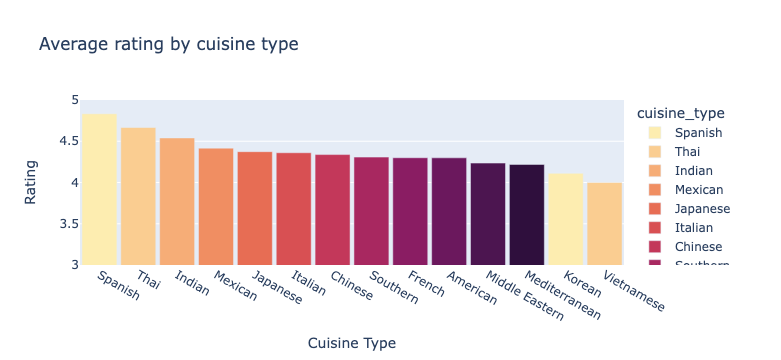

Spanish, Thai, and Indian cuisines have the highest mean ratings, in that order.


In [536]:
fig = px.bar(mean_rating, x="cuisine_type", y="rating", color="cuisine_type", 
             title="Average rating by cuisine type",color_discrete_sequence=px.colors.sequential.matter)
fig.update_layout(xaxis=dict(type="category"))
fig.update_yaxes(range=[3, 5])
fig.update_layout(xaxis_title="Cuisine Type",yaxis_title="Rating", bargap=0.1)
fig.show()

print("Spanish, Thai, and Indian cuisines have the highest mean ratings, in that order.")

In [537]:
mean_price = food[["cuisine_type","cost_of_the_order"]]
mean_price_by_type = mean_price.groupby("cuisine_type")["cost_of_the_order"].mean().reset_index()
mean_price_by_type = mean_price_by_type.sort_values("cost_of_the_order", ascending=False)

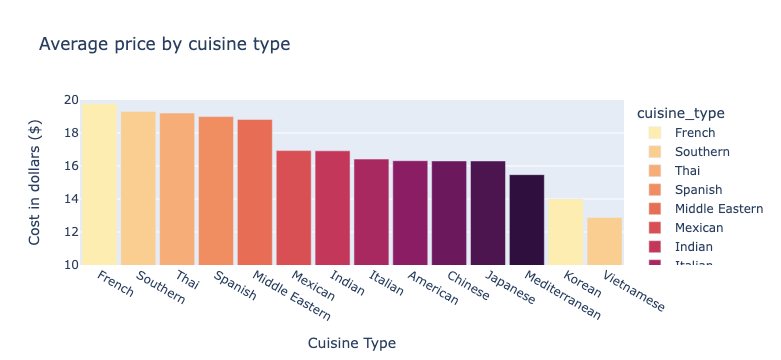

France, Southern, and Thailand cuisines have higher average prices.


In [538]:
fig = px.bar(mean_price_by_type, x="cuisine_type", y="cost_of_the_order", color="cuisine_type", 
             title="Average price by cuisine type",color_discrete_sequence=px.colors.sequential.matter)
fig.update_layout(xaxis=dict(type="category"))
fig.update_yaxes(range=[10, 20])
fig.update_layout(xaxis_title="Cuisine Type",yaxis_title="Cost in dollars ($)", bargap=0.1)
fig.show()

print("France, Southern, and Thailand cuisines have higher average prices.")

In [539]:
prep_time = food[["cuisine_type","food_preparation_time"]]
mean_prep_time = prep_time.groupby("cuisine_type")["food_preparation_time"].mean().reset_index()
mean_prep_time = mean_prep_time.sort_values("food_preparation_time",ascending=False)

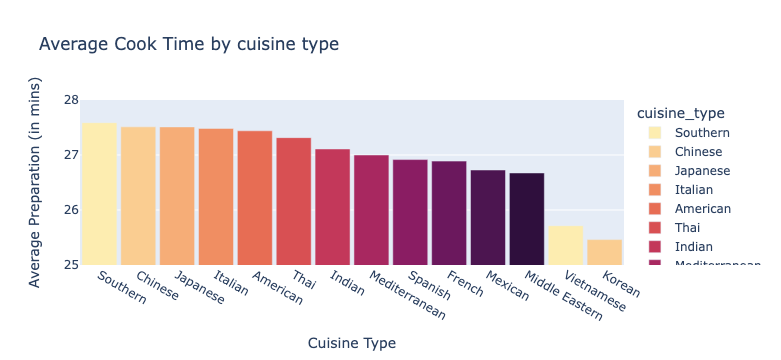

There is little difference in cooking time between Korean and Vietnamese food, with both being faster than Southern food.


In [540]:
fig = px.bar(mean_prep_time, x="cuisine_type", y="food_preparation_time", color="cuisine_type", 
             title="Average Cook Time by cuisine type",color_discrete_sequence=px.colors.sequential.matter)
fig.update_layout(xaxis=dict(type="category"))
fig.update_yaxes(range=[25,28])
fig.update_layout(xaxis_title="Cuisine Type",yaxis_title="Average Preparation (in mins)", bargap=0.1)
fig.show()

print("There is little difference in cooking time between Korean and Vietnamese food, with both being faster than Southern food.")

In [541]:
time_by_day = food[["day_of_the_week", "food_to_home_time"]]
mean_delivery = time_by_day.groupby("day_of_the_week")["food_to_home_time"].mean().reset_index()
mean_delivery["food_to_home_time"] = mean_delivery["food_to_home_time"].round(1)

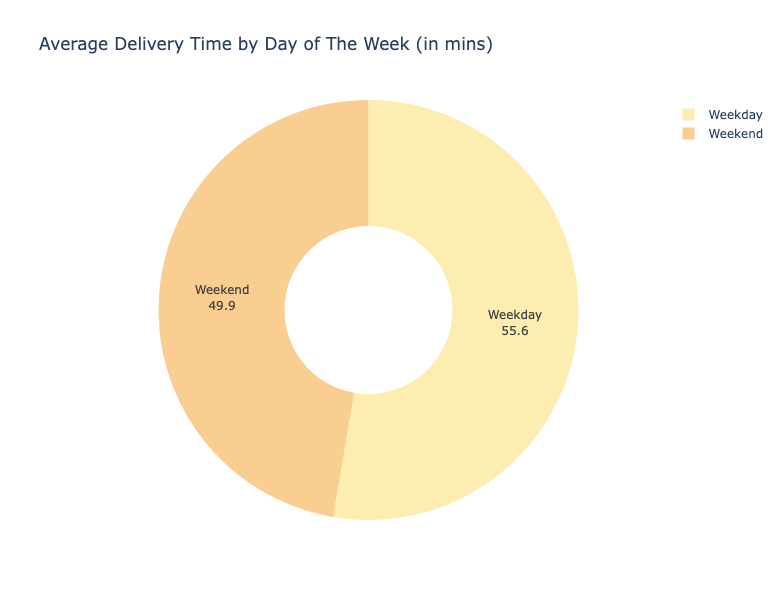

Delivery time is approximately 5 minutes faster on weekends than on weekdays.
Also, 12.91 %  of restaurant orders take more than an hour to deliver.


In [542]:
fig = px.pie(mean_delivery, values="food_to_home_time", names="day_of_the_week",
             color_discrete_sequence=px.colors.sequential.matter,
             title="Average Delivery Time by Day of The Week (in mins)",
             hole=0.4,
             width=800,
             height=600)

fig.update_traces(textposition='inside', textinfo='value+label')

fig.show()

over_hour = time_by_day[time_by_day["food_to_home_time"] >= 60].count()
n_rows_hour = time_by_day.shape[0]

over_an_hour = (245/n_rows_hour)
print("Delivery time is approximately 5 minutes faster on weekends than on weekdays.")
print("Also,",round(over_an_hour*100,2), "%  of restaurant orders take more than an hour to deliver.")

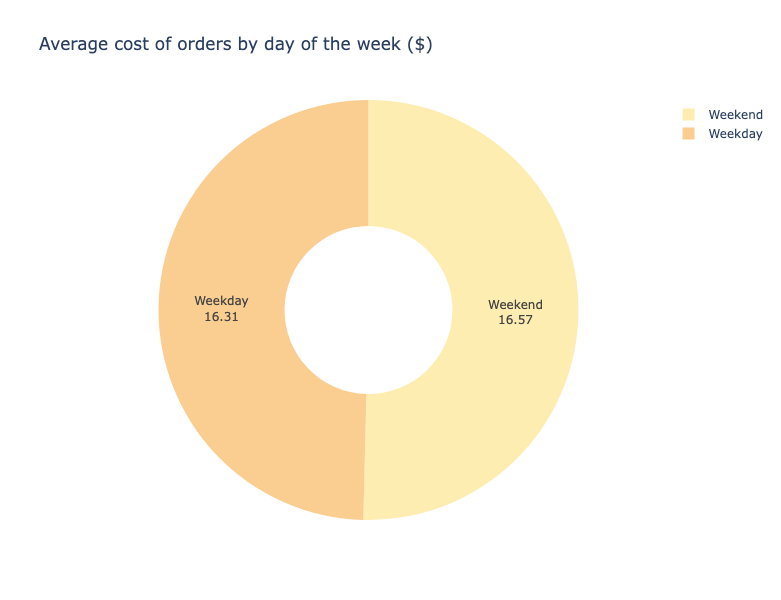

The difference in customer spending depending on the day of the week is small.


In [543]:
cost_by_week = food[["day_of_the_week", "cost_of_the_order"]]
mean_cost_week = cost_by_week.groupby("day_of_the_week")["cost_of_the_order"].mean().reset_index()
mean_cost_week["cost_of_the_order"] = mean_cost_week["cost_of_the_order"].round(2)

fig = px.pie(mean_cost_week, values="cost_of_the_order", names="day_of_the_week",
             color_discrete_sequence=px.colors.sequential.matter,
             title="Average cost of orders by day of the week ($)",
             hole=0.4,
             width=800,
             height=600)

fig.update_traces(textposition='inside', textinfo='value+label')

fig.show()

print("The difference in customer spending depending on the day of the week is small.")  

In [544]:
food_corr = food.copy()
food_corr = food_corr[food_corr['rating'].str.contains('\d')]
food_corr["rating"] = pd.to_numeric(temp_food["rating"])
food_corr.dropna(inplace=True)

food_corr = food_corr.iloc[:, [1,2,3,4,7]]

<AxesSubplot:>

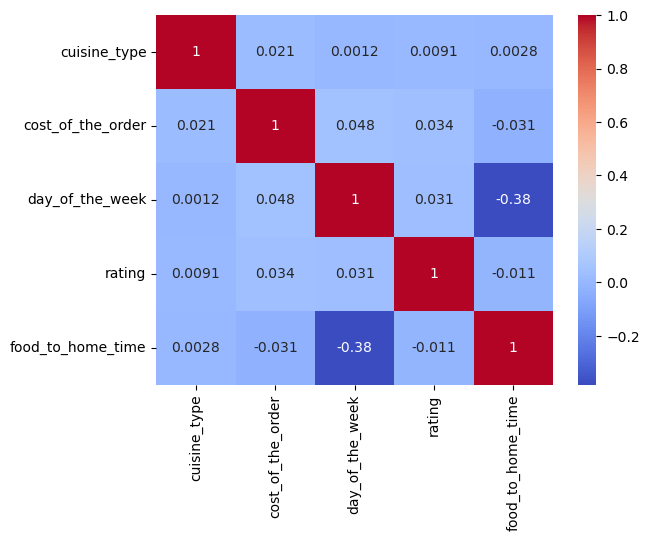

In [545]:
food_corr["day_of_the_week"] = pd.factorize(food_corr["day_of_the_week"])[0]
food_corr["cuisine_type"] = pd.factorize(food_corr["cuisine_type"])[0]

corr = food_corr.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

In [560]:
print("The analysis of food delivery data in NYC using Python revealed several interesting insights.\n\nFirst of all, the top 10 restaurants with the highest orders accounted for 46.73% of the total orders, indicating that a few popular restaurants dominate the food delivery market. Moreover, these restaurants tend to have high ratings, suggesting that customers prefer to order from highly-rated restaurants.\n")
print("Another surprising finding was that the order volume was significantly higher on weekends compared to weekdays. This may indicate that more people prefer to order food on weekends, possibly due to a lack of time or the desire to treat themselves after a busy week.\n")
print("Furthermore, the analysis found that Spanish, Thai, and Indian cuisines have the highest mean ratings, indicating that customers tend to be more satisfied with these cuisines. However, it is important to note that 38.8% of customers do not give a star rating, which could indicate that many customers do not rate their satisfaction.\n")
print("The cooking time for Korean and Vietnamese food was found to be remarkably short, with a difference of only two minutes compared to Southern food, which takes the longest. This suggests that there is no significant difference in cooking time between different cuisines.\n")
print("Additionally, on weekends, the average time for food to reach customers was about five minutes shorter than during the week. This could be due to office workers doing delivery on weekends as a side job. However, it is also important to note that 12.91% of restaurants' foods were delivered after more than an hour.\n")
print("Finally, the analysis found that American, Japanese, and Italian foods were the most popular foods for delivery, including Shake Shack burgers, The Meatball Shop, and Blue Ribbon Sushi. This could indicate that customers prefer fast-foods and sushi.\n")
print("In conclusion, this analysis provides valuable insights into the food delivery market in NYC. However, it is important to note that the findings are based on a limited dataset especially in ratings. Hence, further research is needed to confirm these insights.")



The analysis of food delivery data in NYC using Python revealed several interesting insights.

First of all, the top 10 restaurants with the highest orders accounted for 46.73% of the total orders, indicating that a few popular restaurants dominate the food delivery market. Moreover, these restaurants tend to have high ratings, suggesting that customers prefer to order from highly-rated restaurants.

Another surprising finding was that the order volume was significantly higher on weekends compared to weekdays. This may indicate that more people prefer to order food on weekends, possibly due to a lack of time or the desire to treat themselves after a busy week.

Furthermore, the analysis found that Spanish, Thai, and Indian cuisines have the highest mean ratings, indicating that customers tend to be more satisfied with these cuisines. However, it is important to note that 38.8% of customers do not give a star rating, which could indicate that many customers do not rate their satisfactio